In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
iris = pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.drop("Id", axis=1, inplace=True)

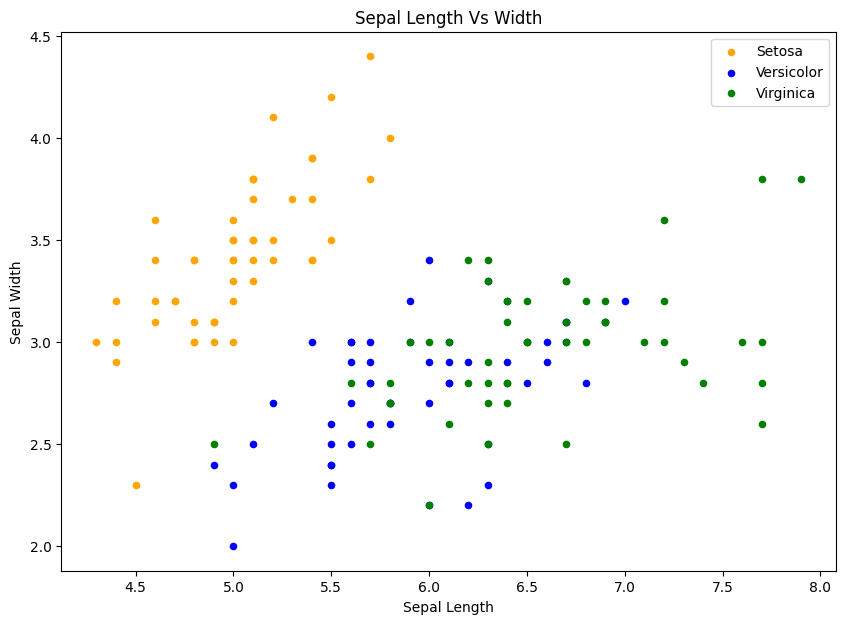

In [7]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

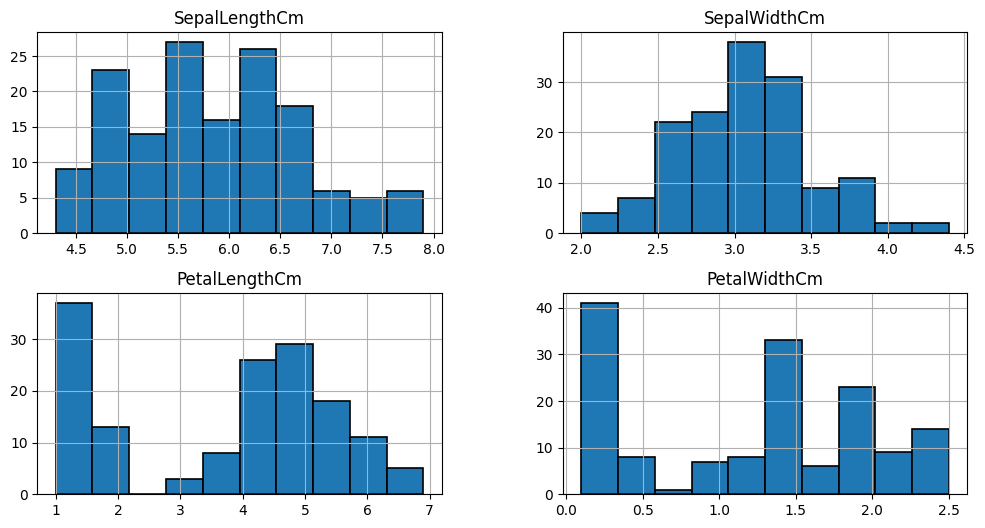

In [8]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [10]:
iris.shape

(150, 5)

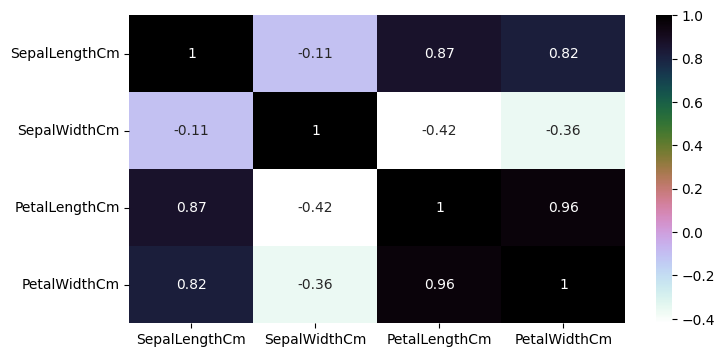

In [11]:
numeric_iris = iris.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8,4))
sns.heatmap(numeric_iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [12]:
train, test = train_test_split(iris, test_size=0.3)

In [13]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
y_train = train.Species # output of the training data

X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
y_test = test.Species # output value of the test data

In [22]:
from sklearn.metrics import f1_score,accuracy_score

In [48]:
from sklearn.metrics import confusion_matrix

<h1> **Support Vector Machines**

In [19]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [57]:
svm_pred= model.predict(X_test)
f1 = f1_score(y_test, svm_pred, average='macro')
acc = accuracy_score(y_test, svm_pred)

print("The accuracy score with SVM: ", acc)
print("The F1 Score with SVM: ", f1)

The accuracy score with SVM:  0.9777777777777777
The F1 Score with SVM:  0.9791463017269469


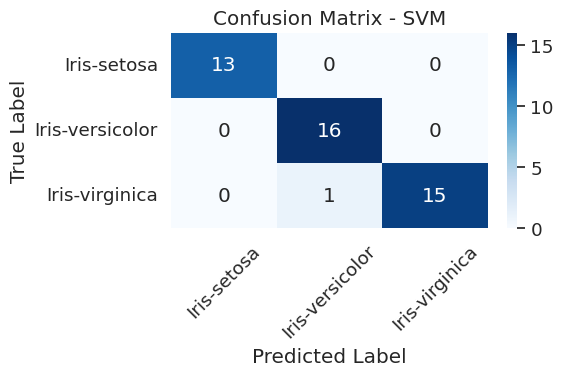

In [59]:
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xticks(rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()

<h1>**KNN**</h1>

In [64]:
model = KNeighborsClassifier(n_neighbors=3)

In [65]:
model.fit(X_train, y_train)
knn_pred=model.predict(X_test)

f1 = f1_score(y_test, knn_pred, average='macro')
acc=accuracy_score(y_test, knn_pred)

print("The accuracy score with KNN with n=3: ", acc)
print("The F1 Score with KNN with n=3: ", f1)

The accuracy score with KNN with n=3:  0.9555555555555556
The F1 Score with KNN with n=3:  0.9583333333333334


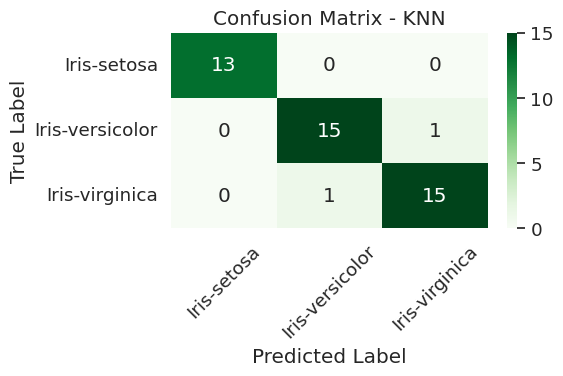

In [66]:
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt='d',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xticks(rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN")
plt.tight_layout()
plt.show()

<h1>**Logistic Regression**</h1>

In [27]:
model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)
lr_pred=model.predict(X_test)

f1 = f1_score(y_test, lr_pred, average='macro')
acc=accuracy_score(y_test, lr_pred)

In [68]:
print("The F1 Score with Logistic Regression: ", f1)
print("The accuracy score with Logistic Regression: ", acc)

The F1 Score with Logistic Regression:  0.9583333333333334
The accuracy score with Logistic Regression:  0.9555555555555556


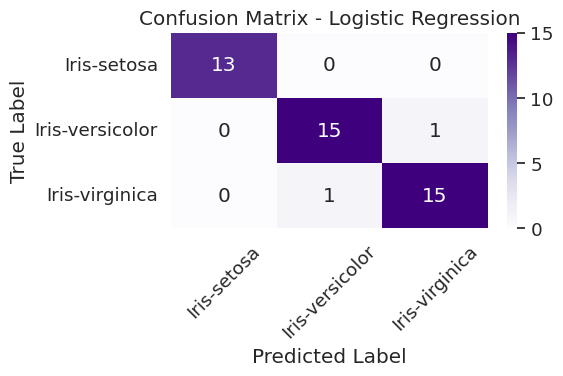

In [69]:
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Purples", fmt='d',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xticks(rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

<h1>**Decision Tree**</h1>

In [70]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
dt_pred=model.predict(X_test)

In [71]:
f1 = f1_score(y_test, dt_pred, average='macro')
acc= accuracy_score(y_test, dt_pred)

In [72]:
print('The accuracy score with Decision Tree: ', acc)
print('The F1 Score with Decision Tree: ', f1)

The accuracy score with Decision Tree:  0.8888888888888888
The F1 Score with Decision Tree:  0.8957315086347345


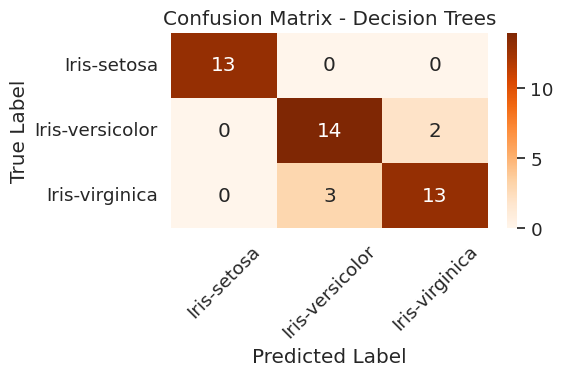

In [73]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='d',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xticks(rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Trees")
plt.tight_layout()
plt.show()

<h1> **Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

f1 = f1_score(y_test, rf_pred, average='macro')
acc = accuracy_score(y_test, rf_pred)

print("The accuracy score of Random Forest: ", acc)
print("The F1 Score of Random Forest: ", f1)

The accuracy score of Random Forest:  0.8888888888888888
The F1 Score of Random Forest:  0.8957315086347345


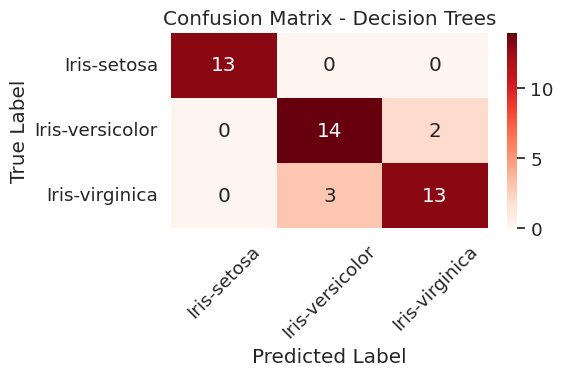

In [76]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xticks(rotation=45)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Decision Trees")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


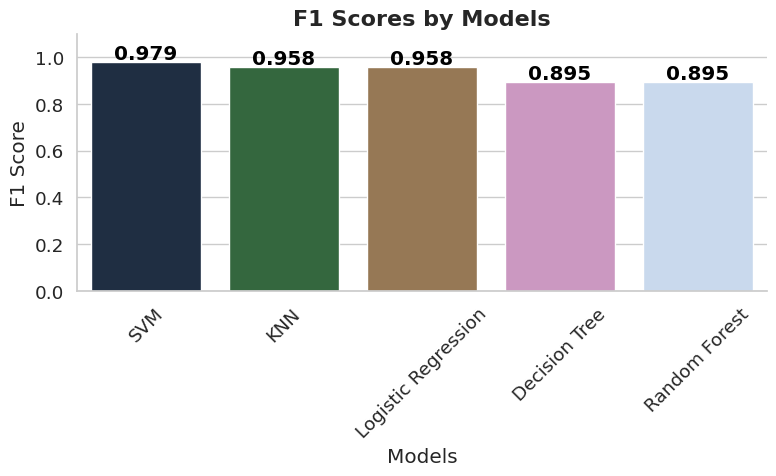

In [77]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)

# Example F1 scores
classes = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
f1_scores = [0.979, 0.958, 0.958, 0.895, 0.895]

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=classes, y=f1_scores, palette='cubehelix')

# Add value labels on bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold', color='black')

# Titles and labels
plt.title('F1 Scores by Models', fontsize=16, weight='bold')
plt.ylim(0, 1.1)
plt.ylabel('F1 Score')
plt.xlabel('Models')
plt.xticks(rotation=45)

# Remove top and right spines for cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


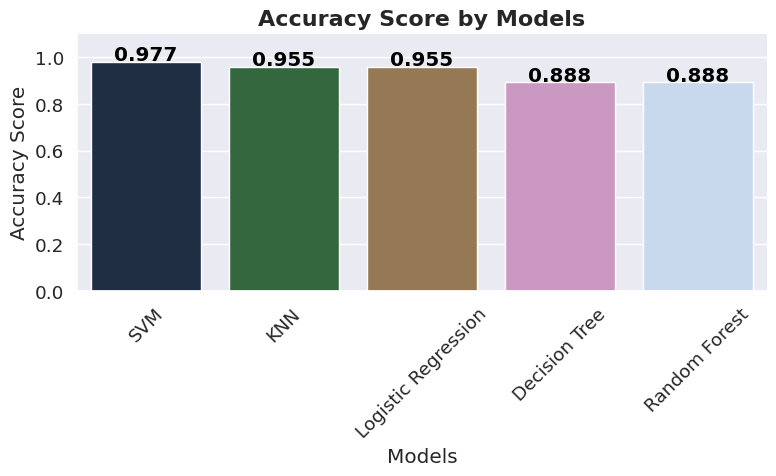

In [79]:
sns.set(style="darkgrid", palette="bright", font_scale=1.2)

# Example F1 scores
classes = ['SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest']
acc_score = [0.977, 0.955, 0.955, 0.888, 0.888]

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=classes, y=f1_scores, palette='cubehelix')

# Add value labels on bars
for i, v in enumerate(acc_score):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold', color='black')

# Titles and labels
plt.title('Accuracy Score by Models', fontsize=16, weight='bold')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy Score')
plt.xlabel('Models')
plt.xticks(rotation=45)

# Remove top and right spines for cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()